In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re

In [2]:
df=pd.read_csv("nyc_taxis_weather_jantoaug19s.csv")
df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,date,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,1/17/19,33.0,24.0,28.5,-3.7,36.0,0.0,0.00,0.0,0.0
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,1/7/19,34.0,25.0,29.5,-3.2,35.0,0.0,0.00,0.0,0.0
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,1/29/19,43.0,25.0,34.0,1.1,31.0,0.0,0.23,0.0,0.0
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,1/10/19,34.0,28.0,31.0,-1.4,34.0,0.0,0.00,0.0,0.0
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,1/24/19,59.0,35.0,47.0,14.5,18.0,0.0,1.33,0.0,0.0


In [3]:
df["pickup_datetime"]=pd.to_datetime(df['pickup_datetime'])
df["dropoff_datetime"]=pd.to_datetime(df['dropoff_datetime'])
df["date"]=pd.to_datetime(df['date'])

In [4]:
df.describe()

,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,...,trip_duration_mins,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
count,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,...,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000
mean,162.710837,161.253165,1.052756,1.972424,1.069523,13.068938,0.299957,0.498031,1.571951,1.284299,...,17.901480,62.709468,48.408401,55.558935,0.568466,13.058108,3.868634,0.154170,0.059396,0.074644
std,65.930485,70.204930,0.669901,1.020099,1.237576,11.634544,0.003578,0.031317,1.223892,0.465248,...,71.228883,19.321813,18.013049,18.503470,6.782948,14.374985,5.924168,0.315305,0.374366,0.418558
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,14.000000,2.000000,9.000000,-24.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,107.000000,1.000000,2.500000,0.000000,6.500000,0.300000,0.500000,1.000000,1.000000,...,6.680000,46.000000,34.000000,40.500000,-3.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,162.000000,162.000000,1.000000,2.500000,0.500000,9.500000,0.300000,0.500000,1.000000,1.000000,...,11.130000,66.000000,50.000000,56.500000,0.900000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,233.000000,233.000000,1.000000,2.500000,2.500000,14.500000,0.300000,0.500000,2.000000,2.000000,...,18.200000,80.000000,65.000000,72.000000,4.600000,24.000000,7.000000,0.100000,0.000000,0.000000
max,265.000000,265.000000,99.000000,2.500000,17.500000,314.000000,0.300000,0.500000,6.000000,4.000000,...,1439.020000,95.000000,82.000000,88.500000,20.800000,56.000000,24.000000,1.820000,4.000000,4.000000


In [5]:
df.dtypes

pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
PULocationID                      int64
DOLocationID                      int64
RatecodeID                      float64
congestion_surcharge            float64
extra                           float64
fare_amount                     float64
improvement_surcharge           float64
mta_tax                         float64
passenger_count                 float64
payment_type                    float64
store_and_fwd_flag               object
tip_amount                      float64
tolls_amount                    float64
total_amount                    float64
trip_distance                   float64
pickup_dayofweek                  int64
trip_duration_mins              float64
date                     datetime64[ns]
maxtemp                         float64
mintemp                         float64
avetemp                         float64
departuretemp                   float64
hdd                             float64


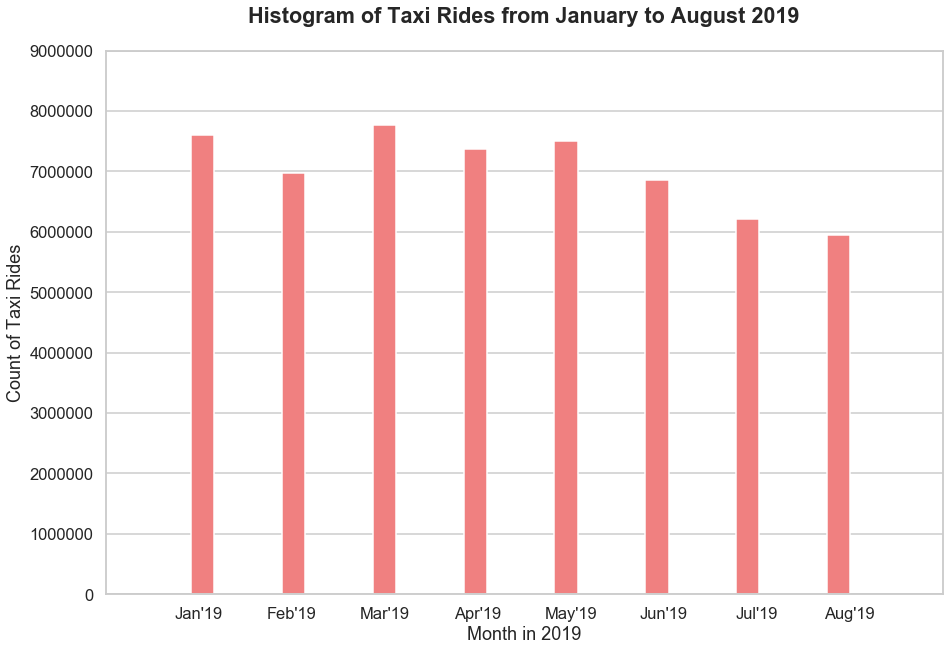

In [6]:
plt.figure(figsize=(15,10))
sns.set(context="talk", style="whitegrid", palette="bright")
g=sns.distplot(df["pickup_datetime"].dt.month, kde=False, hist_kws={"width":0.25,"align":"left","color":"lightcoral", 'alpha': 1})
g.xaxis.grid(b=False)
plt.xlim(0,9)
g.set_xticklabels(["","Jan'19","Feb'19","Mar'19","Apr'19","May'19","Jun'19","Jul'19","Aug'19"])
plt.yticks(g.get_yticks(), (g.get_yticks() * 1/0.002).astype(int))
plt.xlabel("Month in 2019")
plt.ylabel("Count of Taxi Rides")
plt.title("Histogram of Taxi Rides from January to August 2019", fontweight="bold", fontsize="large", y=1.04)
plt.show()

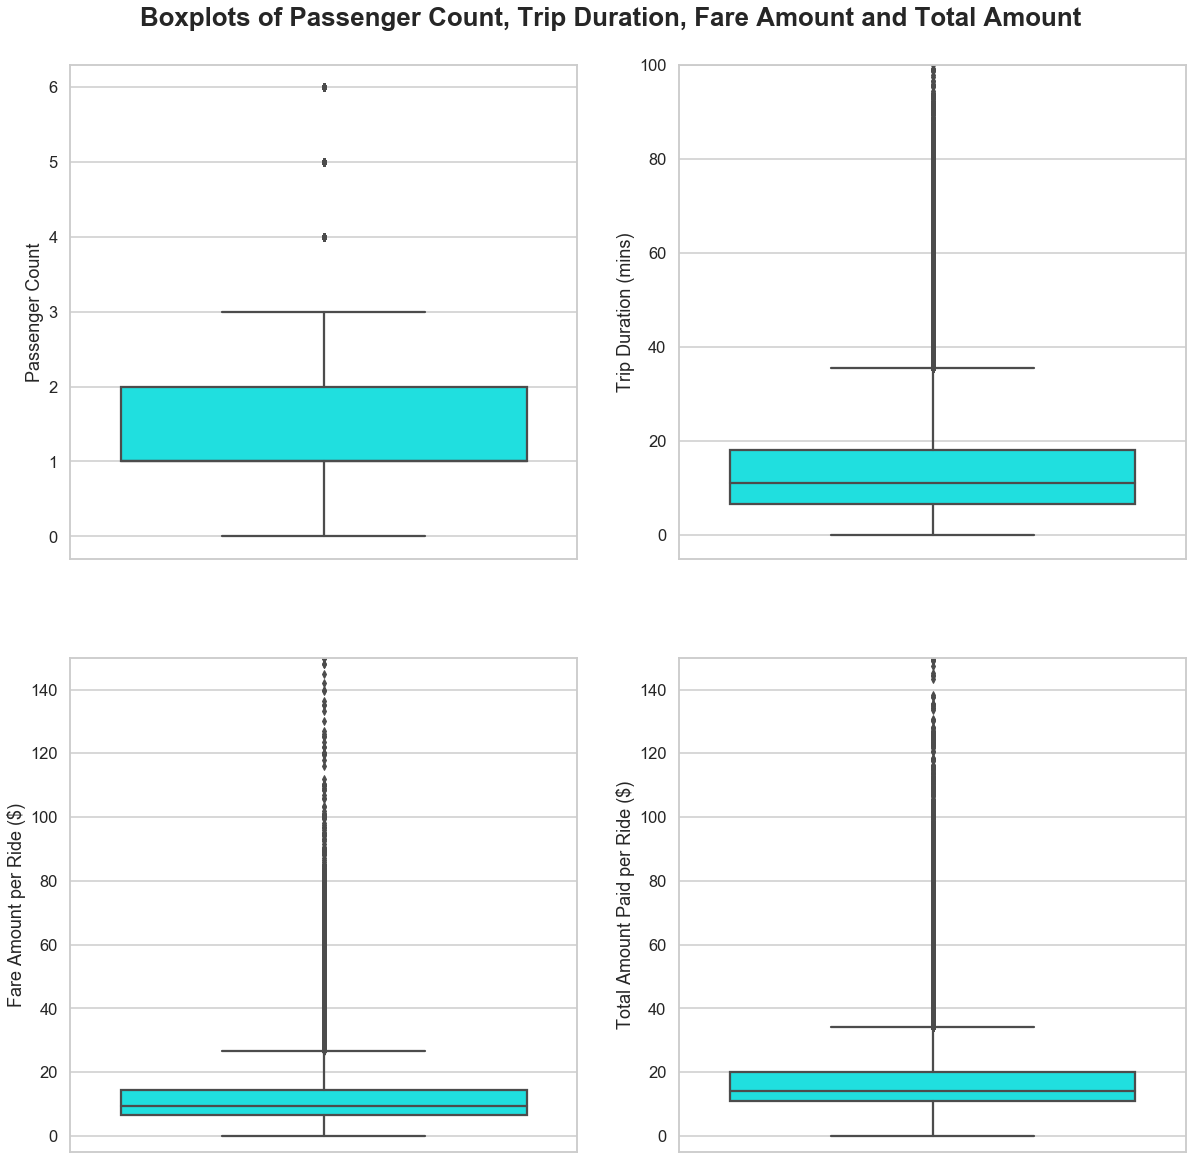

In [7]:
fig,axes=plt.subplots(2,2, figsize=(20,20))

a=sns.boxplot(y=df['passenger_count'], ax=axes[0,0],color="cyan").set(ylabel='Passenger Count')

sns.boxplot(y=df['trip_duration_mins'], ax=axes[0,1],color="cyan").set(ylabel='Trip Duration (mins)')
axes[0,1].set(ylim=(-5, 100))


sns.boxplot(y=df['fare_amount'], ax=axes[1,0],color="cyan").set(ylabel='Fare Amount per Ride ($)')
axes[1,0].set(ylim=(-5, 150))

sns.boxplot(y=df['total_amount'], ax=axes[1,1],color="cyan").set(ylabel='Total Amount Paid per Ride ($)')
axes[1,1].set(ylim=(-5, 150))

fig.suptitle('Boxplots of Passenger Count, Trip Duration, Fare Amount and Total Amount', fontsize="x-large", fontweight="bold", y=0.92)
plt.show()

# How is Taxi Ridership Correlated with Weather?

In [73]:
trip_count_by_date_df = df.groupby("date")["pickup_datetime"].count()
trip_count_by_date_df = trip_count_by_date_df.to_frame(name="trip_count")
trip_count_by_date_df.reset_index(inplace=True)
trip_count_weather_by_date_df = trip_count_by_date_df.merge(df[["date","precipitation","newsnow","maxtemp","avetemp"]], how="inner", on="date")
trip_count_weather_by_date_df = trip_count_weather_by_date_df.groupby("date").first()
trip_count_weather_by_date_df.head()

,trip_count,precipitation,newsnow,maxtemp,avetemp
date,,,,,
2019-01-01,365,0.06,0.0,58.0,48.5
2019-01-02,374,0.00,0.0,40.0,37.5
2019-01-03,456,0.00,0.0,44.0,40.5
2019-01-04,460,0.00,0.0,47.0,41.0
2019-01-05,472,0.50,0.0,47.0,44.0


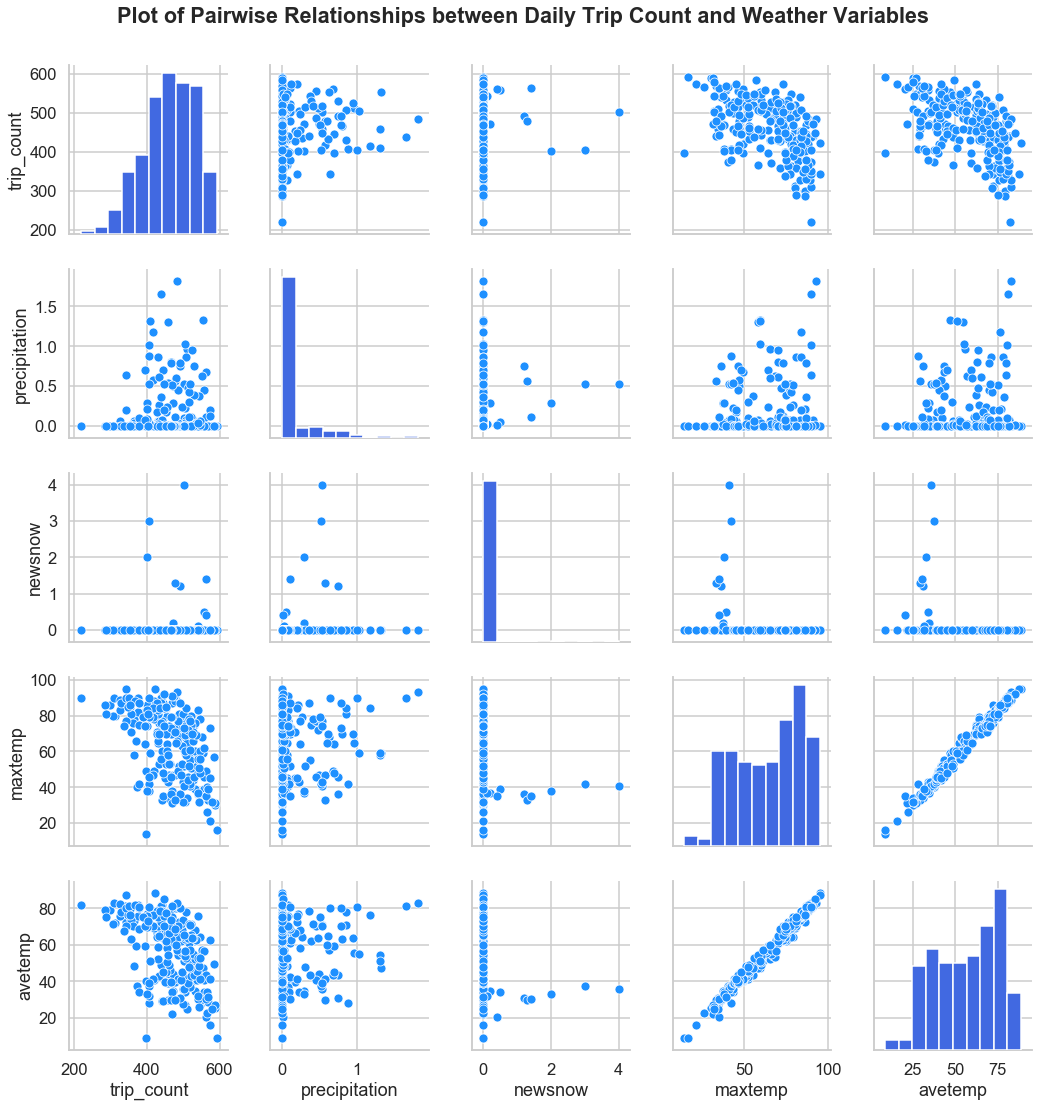

In [106]:
g=sns.pairplot(trip_count_weather_by_date_df, height=3, plot_kws={"color":"dodgerblue"}, diag_kws={"color":"royalblue"})
g.fig.suptitle("Plot of Pairwise Relationships between Daily Trip Count and Weather Variables", fontweight="bold", fontsize="large",y=1.03)
plt.show()

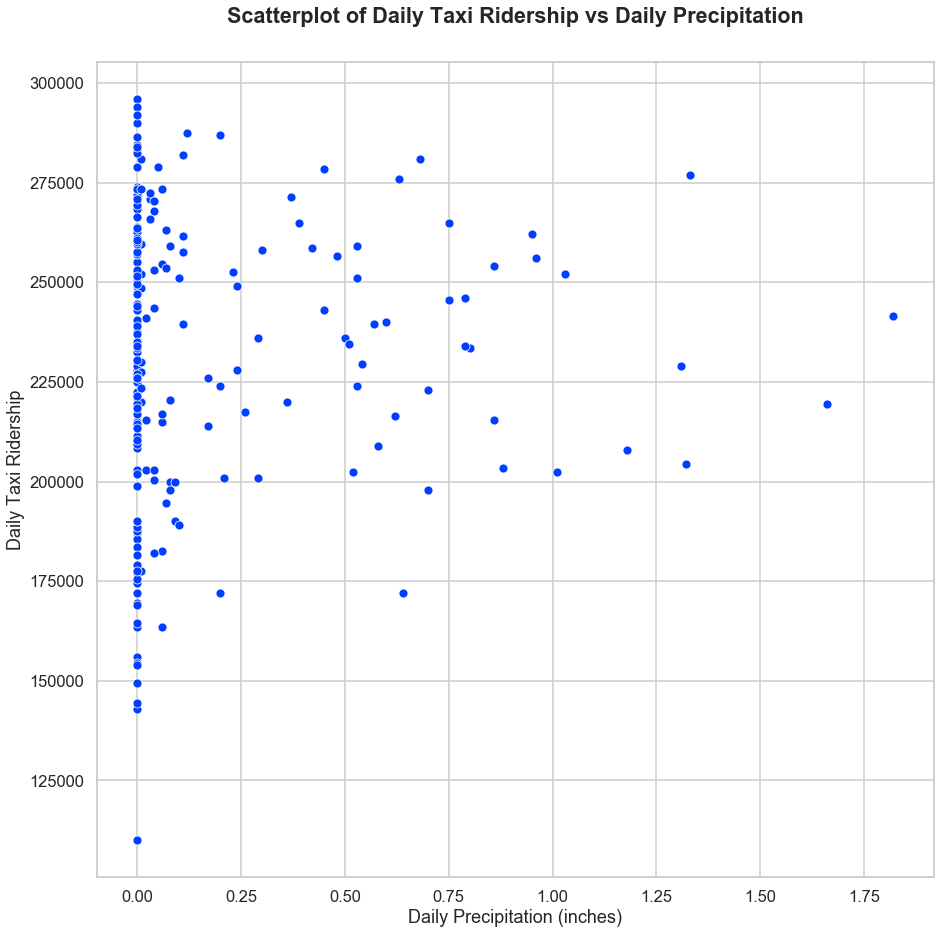

In [69]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["precipitation"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Precipitation (inches)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Daily Precipitation", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [70]:
np.corrcoef(trip_count_weather_by_date_df["precipitation"],trip_count_weather_by_date_df["trip_count"])

array([[1.        , 0.04993018],
       [0.04993018, 1.        ]])

Positive correlation between precipitation and number of trips in a day. High precipitation guarantees high trip count, but high trip count does not only occur on high-precipitation days. 

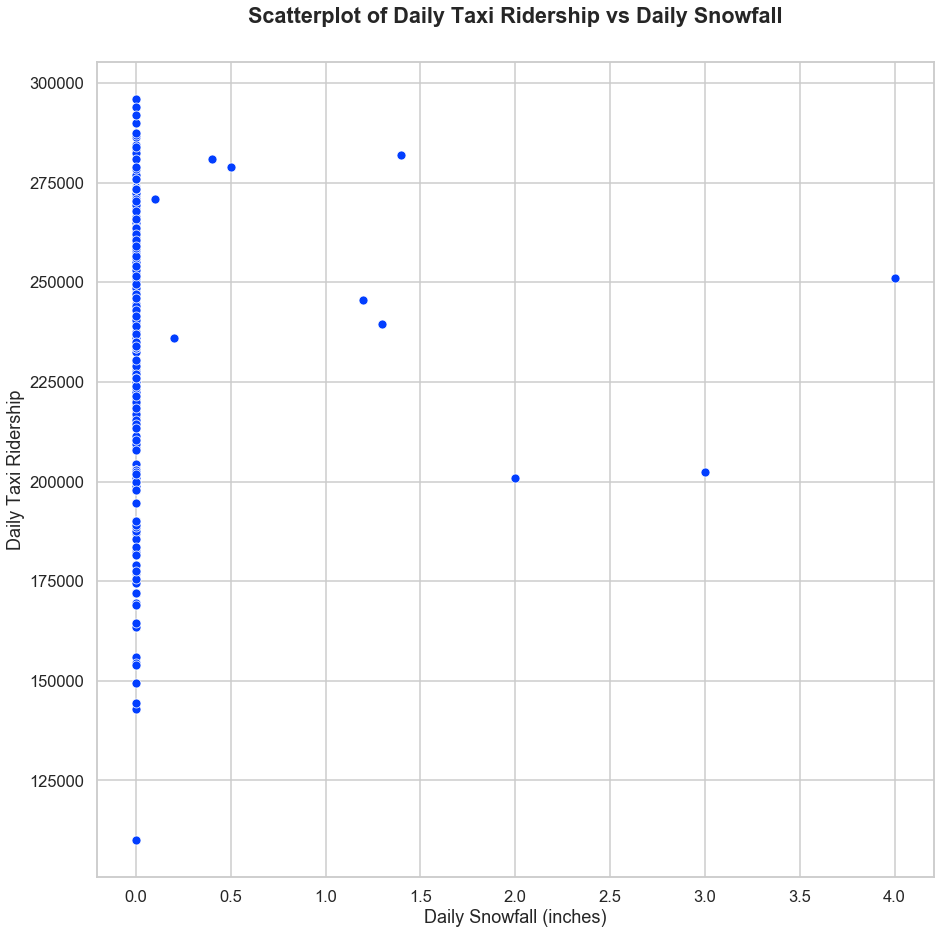

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["newsnow"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Snowfall (inches)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Daily Snowfall", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Too few days with snowfall to draw meaningful conclusions. 

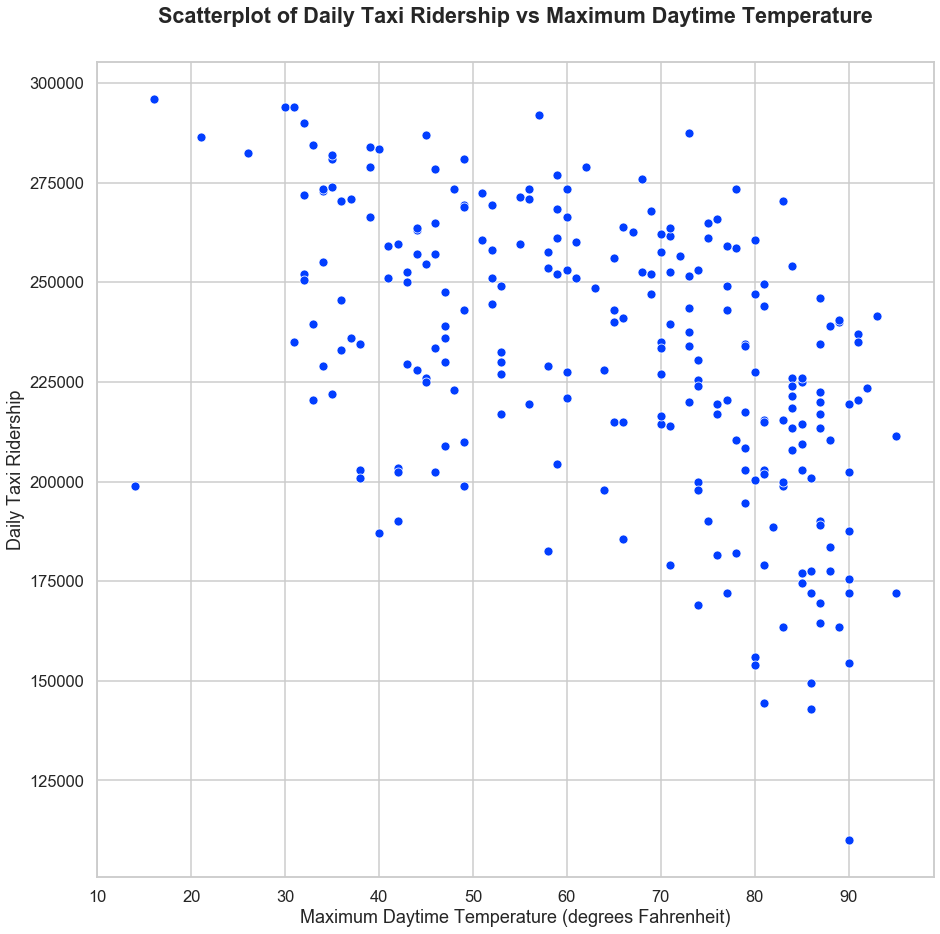

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["maxtemp"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Maximum Daytime Temperature (degrees Fahrenheit)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Maximum Daytime Temperature", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [12]:
np.corrcoef(trip_count_weather_by_date_df["maxtemp"],trip_count_weather_by_date_df["trip_count"])

array([[ 1.        , -0.52443419],
       [-0.52443419,  1.        ]])

An increase in daytime temperature is correlated with a decrease in daily taxi ridership. There is a moderately strong negative correlation. 

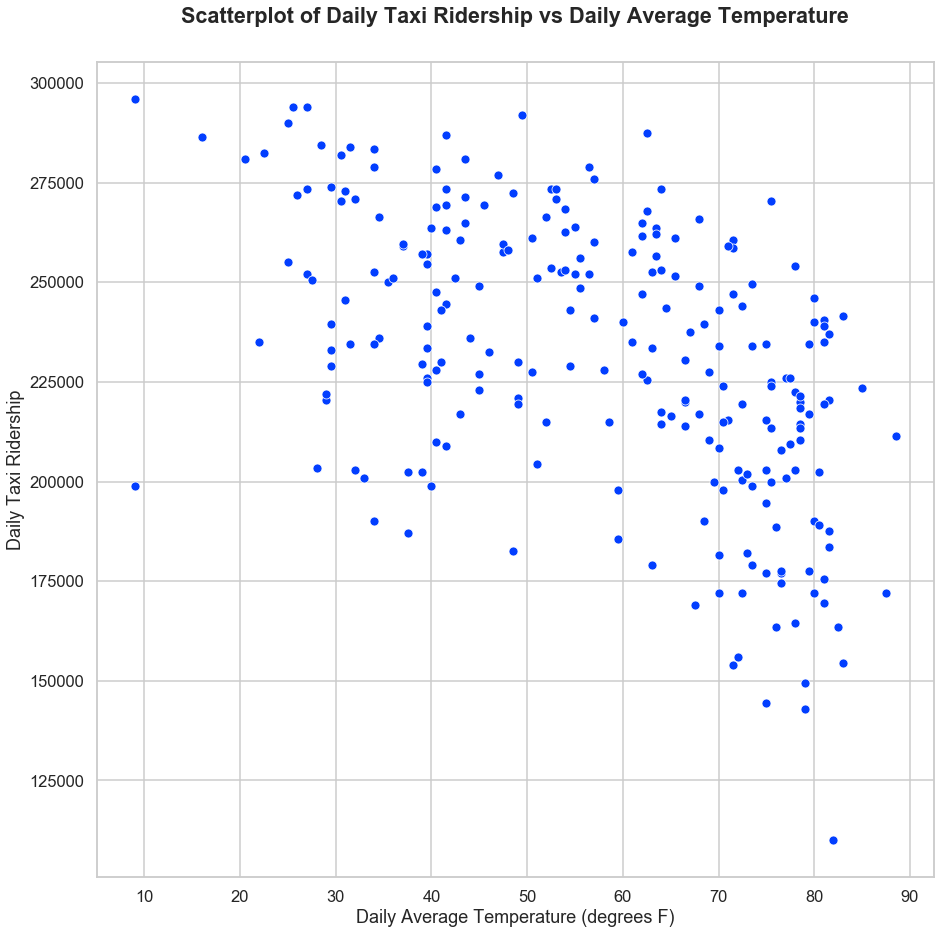

In [13]:
fig,ax=plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["avetemp"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Average Temperature (degrees F)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Daily Average Temperature", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [14]:
np.corrcoef(trip_count_weather_by_date_df["avetemp"],trip_count_weather_by_date_df["trip_count"])

array([[ 1.        , -0.53345522],
       [-0.53345522,  1.        ]])

An increase in daily average temperature is correlated with a decrease in daily taxi ridership. There is a moderately strong negative correlation.  

# How is Taxi Ridership Correlated with Time of Day?

In [15]:
# trip_duration_df = df[["pickup_datetime","dropoff_datetime","PULocationID","DOLocationID","pickup_dayofweek"]]

In [16]:
# trip_time_df["pickup_hour"]=pd.to_datetime(df['pickup_datetime']).dt.hour

In [17]:
# trip_count_by_hour = trip_time_df.groupby("pickup_hour")["pickup_datetime"].count().to_frame("trip_count_by_hour")
# trip_count_by_hour.reset_index(inplace=True)
# trip_time_df.merge(trip_count_by_hour, how="left", left_on=pd.to_datetime(df['pickup_datetime']).dt.hour, right_on="pickup_hour")

In [18]:
scaled_daily_df = pd.concat([df]*round(1/0.002/242))
scaled_daily_df

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,date,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,2019-01-17,33.0,24.0,28.5,-3.7,36.0,0.0,0.00,0.0,0.0
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,2019-01-07,34.0,25.0,29.5,-3.2,35.0,0.0,0.00,0.0,0.0
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,2019-01-29,43.0,25.0,34.0,1.1,31.0,0.0,0.23,0.0,0.0
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,2019-01-10,34.0,28.0,31.0,-1.4,34.0,0.0,0.00,0.0,0.0
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,2019-01-24,59.0,35.0,47.0,14.5,18.0,0.0,1.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112475,2019-08-06 13:51:50,2019-08-06 13:58:00,152,152,1.0,0.0,0.0,5.5,0.3,0.5,...,2019-08-06,79.0,71.0,75.0,-1.3,0.0,10.0,0.04,0.0,0.0
112476,2019-08-09 21:52:07,2019-08-09 22:07:06,113,230,1.0,2.5,0.5,11.0,0.3,0.5,...,2019-08-09,83.0,68.0,75.5,-0.6,0.0,11.0,0.08,0.0,0.0
112477,2019-08-01 11:00:06,2019-08-01 11:43:22,138,233,1.0,2.5,0.0,38.5,0.3,0.5,...,2019-08-01,87.0,70.0,78.5,2.0,0.0,14.0,0.00,0.0,0.0
112478,2019-08-18 14:53:39,2019-08-18 14:59:54,141,162,1.0,2.5,0.0,6.0,0.3,0.5,...,2019-08-18,90.0,70.0,80.0,4.8,0.0,15.0,0.64,0.0,0.0


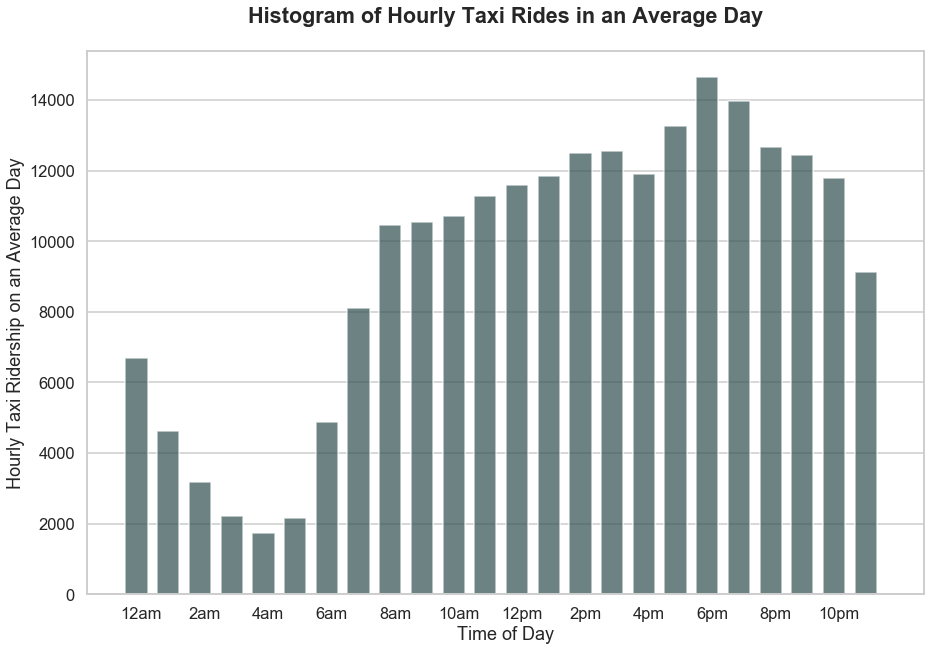

In [19]:
plt.figure(figsize=(15,10))
g=sns.distplot(pd.to_datetime(scaled_daily_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,1)-0.5, kde=False, hist_kws={"width":0.7, "color":"darkslategray", 'alpha': 0.7})
g.xaxis.grid(b=False)
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Hourly Taxi Ridership on an Average Day")
plt.title("Histogram of Hourly Taxi Rides in an Average Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Taxi ridership is lowest in the early morning and peaks at 6pm in an average day. 

In [20]:
isweekend_df=scaled_daily_df.copy()
isweekend_df["isweekend"]=isweekend_df["pickup_dayofweek"].isin([5,6])
isweekend_df[["pickup_dayofweek","isweekend"]]

,pickup_dayofweek,isweekend
0,3,False
1,0,False
2,1,False
3,3,False
4,3,False
...,...,...
112475,1,False
112476,4,False
112477,3,False
112478,6,True


In [21]:
isweekend_y_df=isweekend_df[isweekend_df["isweekend"]==True]
isweekend_n_df=isweekend_df[isweekend_df["isweekend"]==False]

# accounting for how isweekend_df["isweekend"]==True occurs 2/7 of the time
scaled_isweekend_y_df = pd.concat([isweekend_y_df]*5)
scaled_isweekend_n_df = pd.concat([isweekend_n_df]*2)

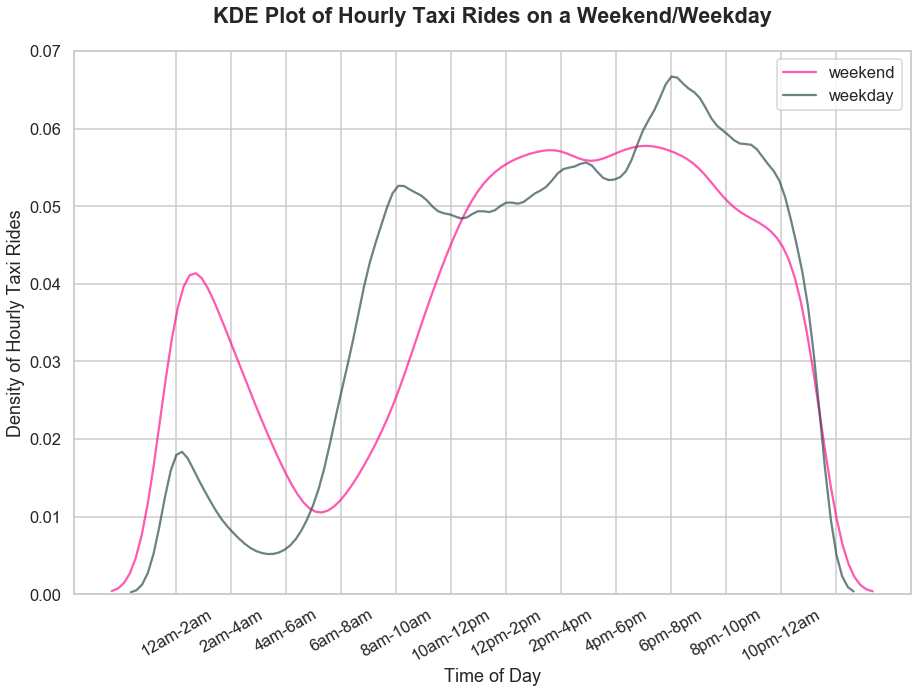

In [22]:
# f, axes = plt.subplots(1, 2, figsize=(20, 20), sharex=True)
plt.figure(figsize=(15,10))
sns.distplot(pd.to_datetime(isweekend_y_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False, label="weekend", kde_kws={"color":"deeppink", 'alpha': 0.7})
sns.distplot(pd.to_datetime(isweekend_n_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False,  label="weekday", kde_kws={"color":"darkslategray", 'alpha': 0.7})
plt.xticks(np.arange(0,25,2), labels=["12am-2am","2am-4am","4am-6am","6am-8am","8am-10am","10am-12pm","12pm-2pm","2pm-4pm","4pm-6pm","6pm-8pm","8pm-10pm","10pm-12am"], rotation=30)
plt.xlabel("Time of Day")
plt.ylabel("Density of Hourly Taxi Rides")
plt.legend()
plt.title("KDE Plot of Hourly Taxi Rides on a Weekend/Weekday", fontweight="bold", fontsize="large", y=1.04)
plt.show()


On weekends, a higher fraction of taxi rides occur in the early hours of the morning (12-4am), perhaps due to the crowd returning from parties. On weekdays, a higher fraction of rides occur in the mid-morning (8-10am) and early evening (6-8pm) as people commute to and from work. 

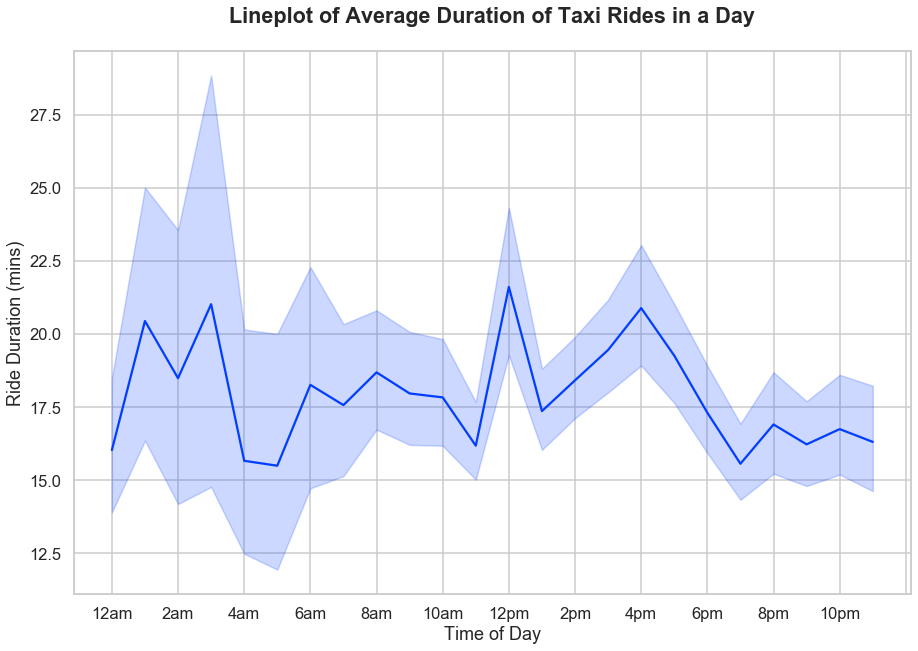

In [23]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(df['pickup_datetime']).dt.hour, df["trip_duration_mins"])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Ride Duration (mins)")
plt.title("Lineplot of Average Duration of Taxi Rides in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

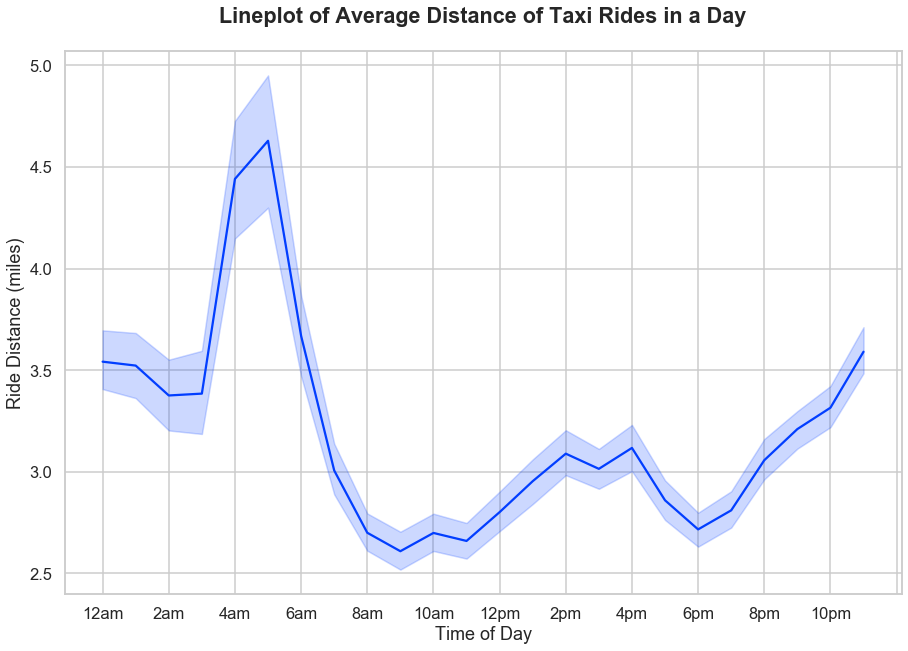

In [24]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(df['pickup_datetime']).dt.hour, df["trip_distance"])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Ride Distance (miles)")
plt.title("Lineplot of Average Distance of Taxi Rides in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [25]:
df[df["trip_duration_mins"]==0]["trip_distance"]

32964     0.60
101724    0.01
109086    0.50
Name: trip_distance, dtype: float64

In [26]:
positive_trip_duration_df=df[df["trip_duration_mins"]>0]

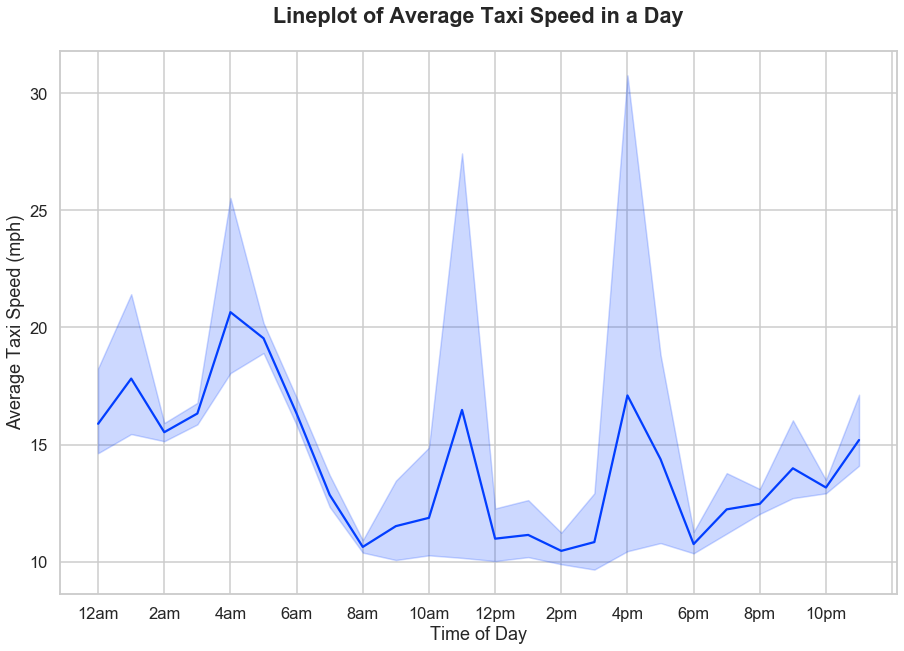

In [27]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(positive_trip_duration_df['pickup_datetime']).dt.hour, positive_trip_duration_df["trip_distance"]/(positive_trip_duration_df["trip_duration_mins"]/60))
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Average Taxi Speed (mph)")
plt.title("Lineplot of Average Taxi Speed in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Average taxi speed is much higher in the early morning hours (around 4am). Therefore, even though these early-morning trips tend to be longer in distance, they last about the same duration as shorter-distance (but much slower) taxi trips around noon. 

In [28]:
isweekend_df=positive_trip_duration_df.copy()
isweekend_df["isweekend"]=isweekend_df["pickup_dayofweek"].isin([5,6])
isweekend_df['isweekend'] = isweekend_df['isweekend'].map({False: 'weekday', True: 'weekend'})
isweekend_df[["pickup_dayofweek","isweekend"]]

,pickup_dayofweek,isweekend
0,3,weekday
1,0,weekday
2,1,weekday
3,3,weekday
4,3,weekday
...,...,...
112475,1,weekday
112476,4,weekday
112477,3,weekday
112478,6,weekend


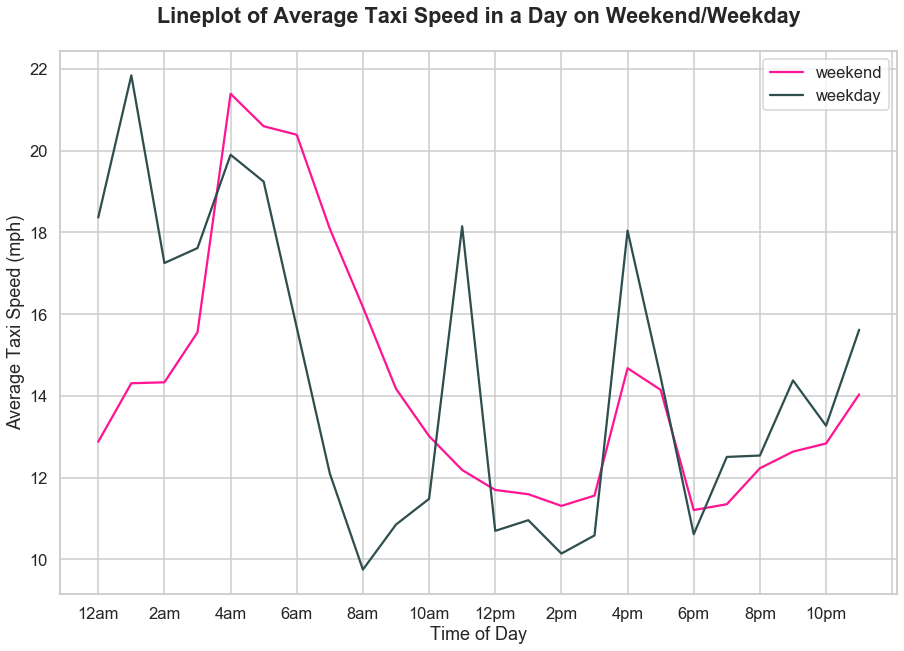

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(pd.to_datetime(isweekend_df['pickup_datetime']).dt.hour, isweekend_df["trip_distance"]/(isweekend_df["trip_duration_mins"]/60), hue=isweekend_df["isweekend"], hue_order=["weekend","weekday"], err_style=None, palette=sns.color_palette(palette = ["deeppink", "darkslategray"]))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Average Taxi Speed (mph)")
plt.title("Lineplot of Average Taxi Speed in a Day on Weekend/Weekday", fontweight="bold", fontsize="large", y=1.04)
plt.show()

# Other Correlations in the Data

In [51]:
df[["tip_amount","fare_amount","pickup_dayofweek","trip_duration_mins","trip_distance",'payment_type',"passenger_count","precipitation"]].corr()

,tip_amount,fare_amount,pickup_dayofweek,trip_duration_mins,trip_distance,payment_type,passenger_count,precipitation
tip_amount,1.000000,0.534730,-0.024387,0.071485,0.515815,-0.458339,0.001640,0.005274
fare_amount,0.534730,1.000000,-0.008190,0.154416,0.938998,-0.034535,0.009503,0.000976
pickup_dayofweek,-0.024387,-0.008190,1.000000,-0.005445,0.006669,0.032128,0.028226,0.007697
trip_duration_mins,0.071485,0.154416,-0.005445,1.000000,0.146018,0.000230,0.006877,0.001412
trip_distance,0.515815,0.938998,0.006669,0.146018,1.000000,-0.031218,0.010189,-0.005824
payment_type,-0.458339,-0.034535,0.032128,0.000230,-0.031218,1.000000,0.017693,-0.005407
passenger_count,0.001640,0.009503,0.028226,0.006877,0.010189,0.017693,1.000000,-0.002420
precipitation,0.005274,0.000976,0.007697,0.001412,-0.005824,-0.005407,-0.002420,1.000000


In [50]:
df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
       'RatecodeID', 'congestion_surcharge', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date',
       'maxtemp', 'mintemp', 'avetemp', 'departuretemp', 'hdd', 'cdd',
       'precipitation', 'newsnow', 'snowdepth'],
      dtype='object')

In [30]:
taxi_zone_lookup_df = pd.read_csv("taxi_zone_lookup.csv")
taxi_zone_lookup_df.head()

,LocationID,Borough,Zone,service_zone,manhattan_zone
0,1,EWR,Newark Airport,EWR,NaN
1,2,Queens,Jamaica Bay,Boro Zone,NaN
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,NaN
3,4,Manhattan,Alphabet City,Yellow Zone,Downtown
4,5,Staten Island,Arden Heights,Boro Zone,NaN


In [31]:
location_df=df.copy()[['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID','fare_amount','passenger_count', 'payment_type','tip_amount', 'tolls_amount', 'total_amount','trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date']]

In [32]:
lagg_df=location_df.merge(taxi_zone_lookup_df,how="left",left_on=location_df["PULocationID"], right_on=taxi_zone_lookup_df["LocationID"])
lagg_df.rename(columns={"Borough":"PUborough","Zone":"PUzone","service_zone":"PUservice_zone","manhattan_zone":"PUmanhattan_zone"},inplace=True)
lagg_df.drop(columns=["key_0","LocationID"],inplace=True)
lagg_df=lagg_df.merge(taxi_zone_lookup_df,how="left",left_on=lagg_df["DOLocationID"], right_on=taxi_zone_lookup_df["LocationID"])
lagg_df.rename(columns={"Borough":"DOborough","Zone":"DOzone","service_zone":"DOservice_zone","manhattan_zone":"DOmanhattan_zone"},inplace=True)
lagg_df.drop(columns=["key_0","LocationID"],inplace=True)
lagg_df

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,fare_amount,passenger_count,payment_type,tip_amount,tolls_amount,total_amount,...,trip_duration_mins,date,PUborough,PUzone,PUservice_zone,PUmanhattan_zone,DOborough,DOzone,DOservice_zone,DOmanhattan_zone
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,5.0,1.0,1.0,1.36,0.00,8.16,...,4.67,2019-01-17,Manhattan,Midtown East,Yellow Zone,Midtown,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,19.5,1.0,2.0,0.00,0.00,20.80,...,24.73,2019-01-07,Manhattan,Penn Station/Madison Sq West,Yellow Zone,Midtown,Manhattan,East Harlem South,Boro Zone,Uptown
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,6.0,1.0,2.0,0.00,0.00,6.80,...,6.80,2019-01-29,Manhattan,Upper East Side North,Yellow Zone,Uptown,Manhattan,Upper East Side South,Yellow Zone,Uptown
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,29.0,2.0,2.0,0.00,0.00,30.30,...,17.78,2019-01-10,Manhattan,SoHo,Yellow Zone,Downtown,Queens,LaGuardia Airport,Airports,NaN
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,9.0,1.0,1.0,0.50,0.00,10.30,...,13.45,2019-01-24,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown,Manhattan,Murray Hill,Yellow Zone,Midtown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112475,2019-08-06 13:51:50,2019-08-06 13:58:00,152,152,5.5,3.0,2.0,0.00,0.00,6.30,...,6.17,2019-08-06,Manhattan,Manhattanville,Boro Zone,Uptown,Manhattan,Manhattanville,Boro Zone,Uptown
112476,2019-08-09 21:52:07,2019-08-09 22:07:06,113,230,11.0,1.0,1.0,1.50,0.00,16.30,...,14.98,2019-08-09,Manhattan,Greenwich Village North,Yellow Zone,Downtown,Manhattan,Times Sq/Theatre District,Yellow Zone,Midtown
112477,2019-08-01 11:00:06,2019-08-01 11:43:22,138,233,38.5,1.0,1.0,9.58,6.12,57.50,...,43.27,2019-08-01,Queens,LaGuardia Airport,Airports,NaN,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown
112478,2019-08-18 14:53:39,2019-08-18 14:59:54,141,162,6.0,1.0,1.0,1.86,0.00,11.16,...,6.25,2019-08-18,Manhattan,Lenox Hill West,Yellow Zone,Uptown,Manhattan,Midtown East,Yellow Zone,Midtown


In [33]:
pu_manhattan_df=lagg_df[~pd.isnull(lagg_df["PUmanhattan_zone"])]

In [34]:
do_manhattan_df=lagg_df[~pd.isnull(lagg_df["PUmanhattan_zone"])]

In [107]:
pu_manhattan_df.corr()

,PULocationID,DOLocationID,fare_amount,passenger_count,payment_type,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,trip_duration_mins
PULocationID,1.000000,0.077881,-0.032685,-0.004006,-0.023605,0.002952,-0.004563,-0.022578,-0.035488,-0.031796,-0.001131
DOLocationID,0.077881,1.000000,-0.118732,-0.004499,-0.025082,-0.043669,-0.083148,-0.110553,-0.123830,-0.029882,-0.020500
fare_amount,-0.032685,-0.118732,1.000000,0.009185,-0.037207,0.464535,0.591521,0.966785,0.933841,0.000915,0.137616
passenger_count,-0.004006,-0.004499,0.009185,1.000000,0.019115,-0.001701,0.006213,0.008045,0.010094,0.031546,0.009785
payment_type,-0.023605,-0.025082,-0.037207,0.019115,1.000000,-0.485263,-0.023081,-0.146867,-0.039175,0.030544,0.001068
tip_amount,0.002952,-0.043669,0.464535,-0.001701,-0.485263,1.000000,0.346971,0.644654,0.446534,-0.019558,0.052115
tolls_amount,-0.004563,-0.083148,0.591521,0.006213,-0.023081,0.346971,1.000000,0.656150,0.603145,0.001598,0.063302
total_amount,-0.022578,-0.110553,0.966785,0.008045,-0.146867,0.644654,0.656150,1.000000,0.911854,-0.009921,0.128798
trip_distance,-0.035488,-0.123830,0.933841,0.010094,-0.039175,0.446534,0.603145,0.911854,1.000000,0.021455,0.122117
pickup_dayofweek,-0.031796,-0.029882,0.000915,0.031546,0.030544,-0.019558,0.001598,-0.009921,0.021455,1.000000,-0.002075


# What can Pickup and Dropoff Locations Tell Us?

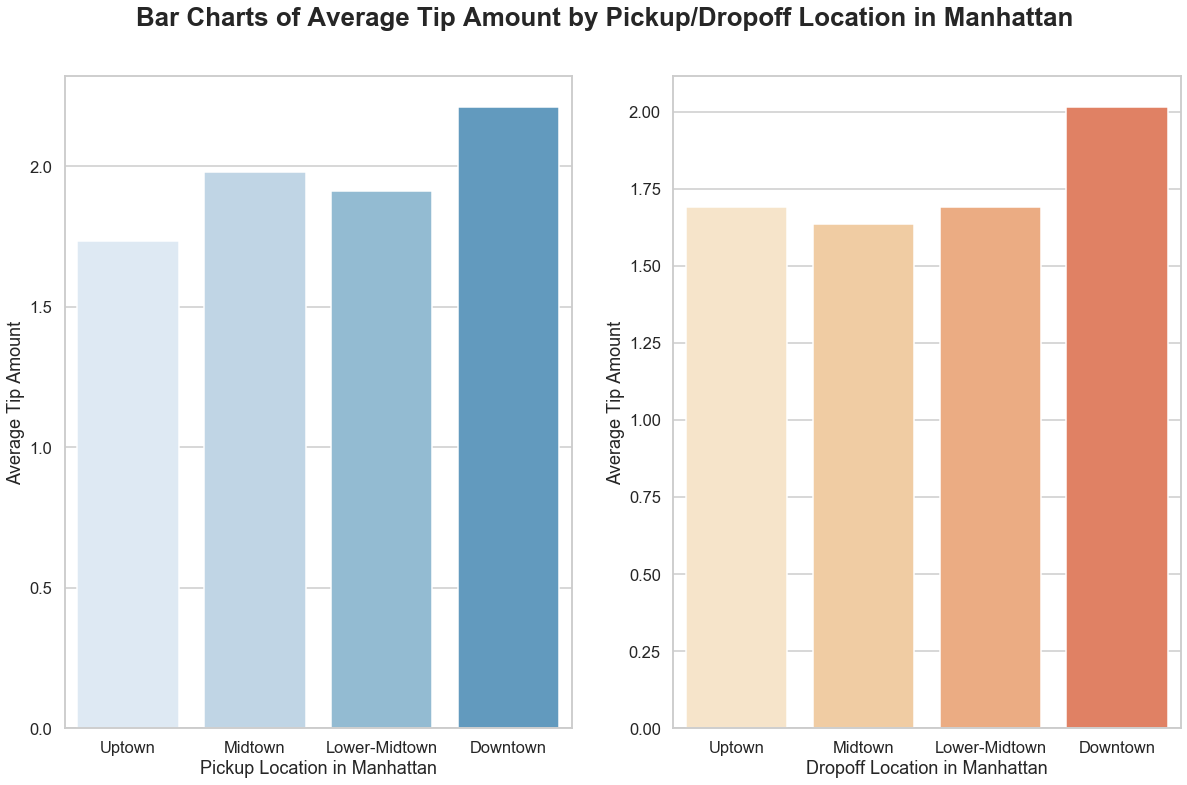

In [35]:
fig,axes=plt.subplots(1,2, figsize=(20,12))

sns.barplot(pu_manhattan_df["PUmanhattan_zone"], pu_manhattan_df["tip_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[0], palette=sns.color_palette("Blues")).set(ylabel='Average Tip Amount', xlabel="Pickup Location in Manhattan")

sns.barplot(do_manhattan_df["DOmanhattan_zone"], do_manhattan_df["tip_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[1],  palette=sns.color_palette("OrRd")).set(ylabel='Average Tip Amount', xlabel="Dropoff Location in Manhattan")

fig.suptitle('Bar Charts of Average Tip Amount by Pickup/Dropoff Location in Manhattan', fontsize="x-large", fontweight="bold", y=0.96)
plt.show()

Rides with pickups or dropoffs in the Downtown area of Manhattan consistently yield a higher tip amount. 

In [36]:
location_pairs_df = df.groupby(["PULocationID","DOLocationID"]).size().to_frame("Count")
location_pairs_df.sort_values(by="Count", ascending=False).head(30)

Count
PULocationID DOLocationID       
264          264             861
237          236             682
236          236             615
             237             554
237          237             551
239          142             313
             238             309
237          162             297
186          230             296
237          161             296
142          239             293
186          161             290
238          239             288
161          237             288
141          236             263
263          236             249
141          237             248
48           68              243
161          161             242
239          239             241
162          170             239
230          186             234
161          230             220
234          170             220
107          170             219
237          141             218
161          234             218
237          142             218
48           48              217
236          263             216

In [37]:
df[df["DOLocationID"]==73][["pickup_datetime","dropoff_datetime","trip_distance","trip_duration_mins","pickup_dayofweek"]].head(40)

,pickup_datetime,dropoff_datetime,trip_distance,trip_duration_mins,pickup_dayofweek
9233,2019-01-22 12:00:07,2019-01-22 12:30:25,11.75,30.30,1
21130,2019-02-01 09:22:16,2019-02-01 09:52:50,10.87,30.57,4
44158,2019-03-15 14:13:38,2019-03-15 14:32:45,6.60,19.12,4
64891,2019-05-17 15:46:55,2019-05-17 16:23:57,8.90,37.03,4
66725,2019-05-04 23:25:00,2019-05-05 00:11:49,14.08,46.82,5
73225,2019-05-25 02:32:02,2019-05-25 03:03:45,13.35,31.72,5
79529,2019-06-21 01:17:21,2019-06-21 01:31:53,5.96,14.53,4
96556,2019-07-26 16:45:56,2019-07-26 17:27:06,5.23,41.17,4
97386,2019-07-17 22:34:27,2019-07-17 23:09:44,14.70,35.28,2
100433,2019-07-03 16:02:55,2019-07-03 16:28:35,4.90,25.67,2


In [38]:
# How is Taxi Ridership Correlated with Weather?

In [39]:
df[df["tip_amount"]>0][["tip_amount"]]

,tip_amount
0,1.36
4,0.50
6,2.90
7,5.82
8,1.26
...,...
112471,1.54
112474,1.00
112476,1.50
112477,9.58


In [40]:
df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
       'RatecodeID', 'congestion_surcharge', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date',
       'maxtemp', 'mintemp', 'avetemp', 'departuretemp', 'hdd', 'cdd',
       'precipitation', 'newsnow', 'snowdepth'],
      dtype='object')